In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy


import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
path = Path('/content/drive/MyDrive/Colab Notebooks/hardhat_photos2')
path.ls()

[PosixPath('/content/drive/MyDrive/Colab Notebooks/hardhat_photos2/train'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/hardhat_photos2/val'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/hardhat_photos2/test'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/hardhat_photos2/models')]

In [4]:
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

['no_helmets', 'with_helmets'] 2
484 72


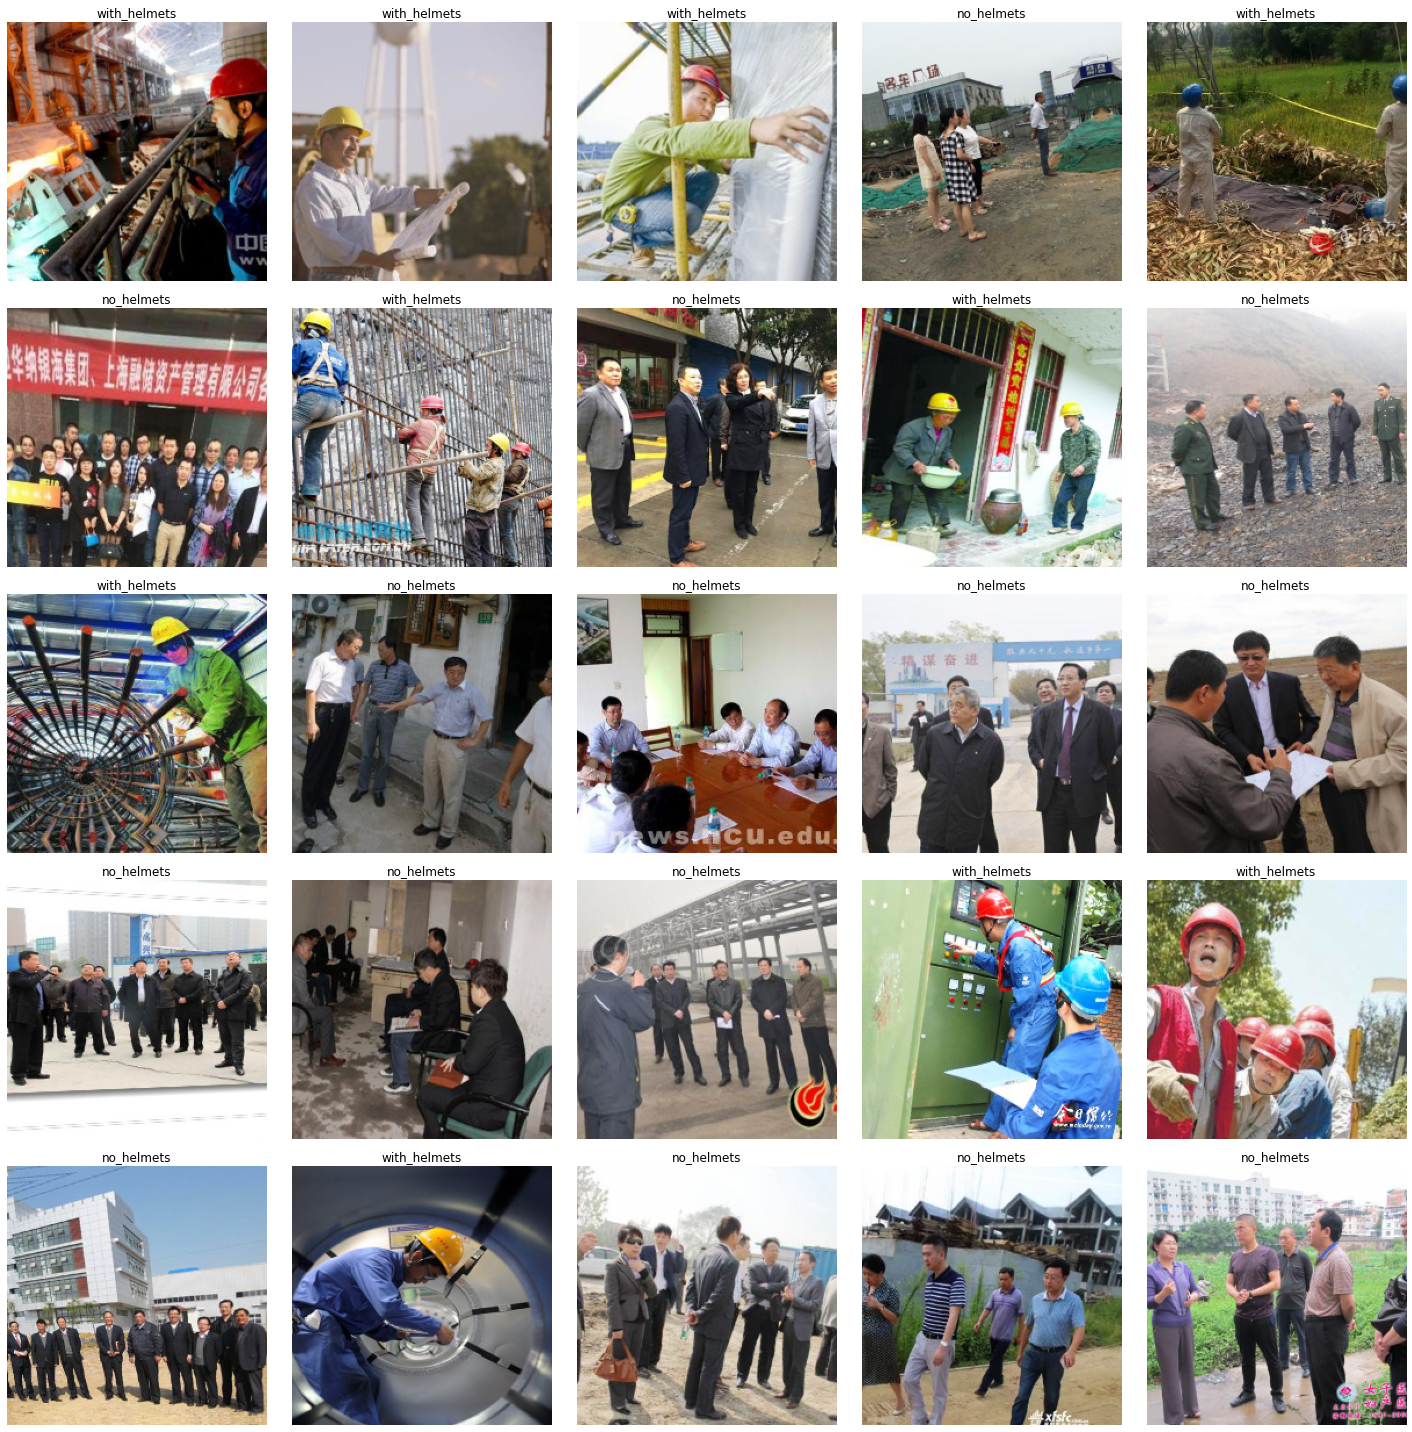

In [5]:
# Show what the data looks like after being transformed
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
print(len(data.train_ds), len(data.valid_ds))

In [6]:
# Building the CNN model with the pretrained resnet34
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [7]:
learn.fit_one_cycle(4)

In [8]:
# Saving the model
learn.save('stage__1')

# Loading the Model
learn.load('stage_1')


Learner(data=ImageDataBunch;

Train: LabelList (484 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no_helmets,no_helmets,no_helmets,no_helmets,no_helmets
Path: /content/drive/MyDrive/Colab Notebooks/hardhat_photos2;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no_helmets,no_helmets,no_helmets,no_helmets,no_helmets
Path: /content/drive/MyDrive/Colab Notebooks/hardhat_photos2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 8.32E-05


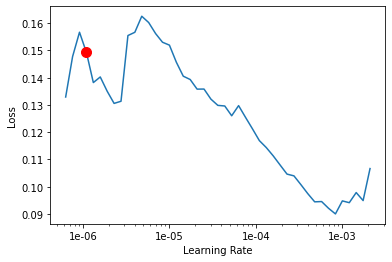

In [9]:
# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [10]:
# Fitting the model over 2 epochs. Increased the accuracy to 94%
learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))

In [11]:
# Building a Classification Interpretation object from our learn model
interp = ClassificationInterpretation.from_learner(learn)

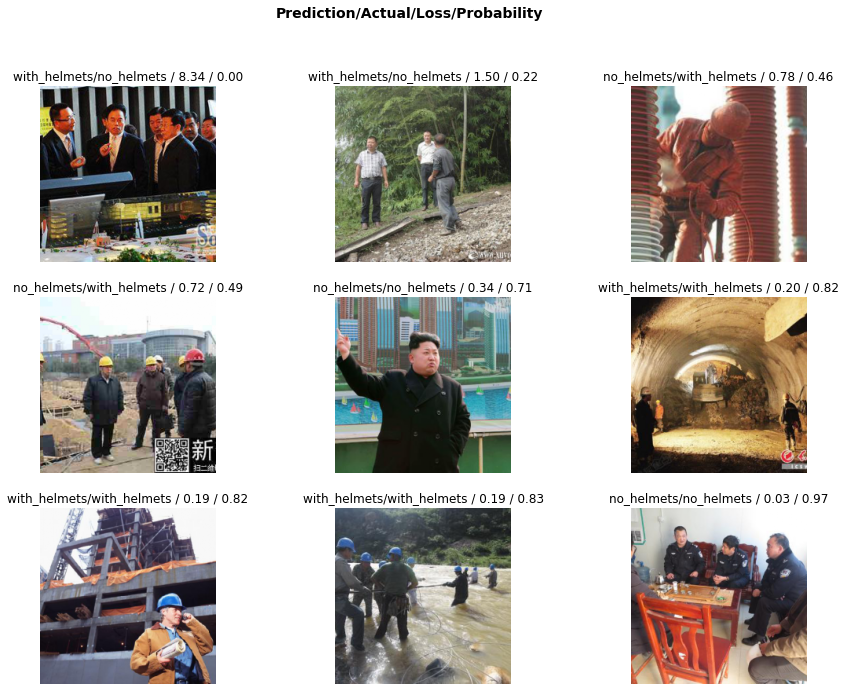

In [12]:
# Showing top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

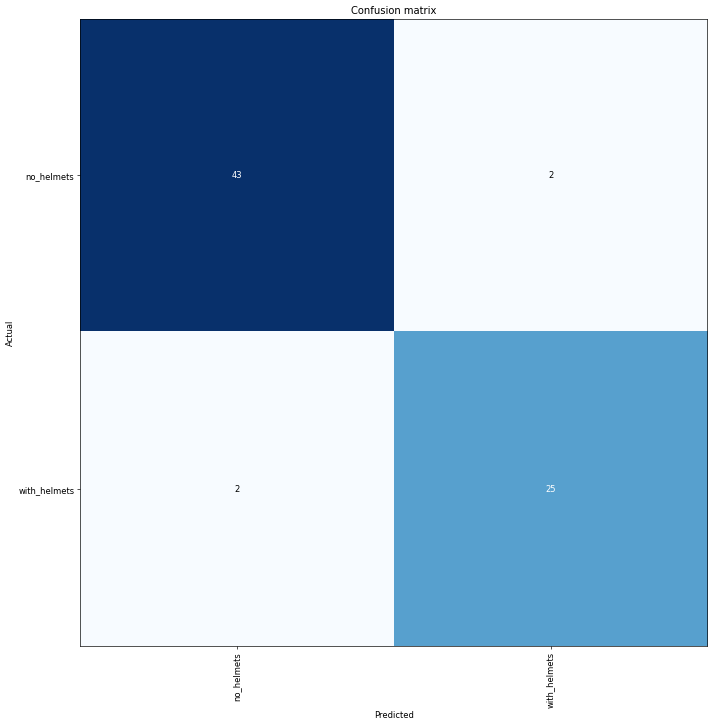

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
interp.most_confused(min_val=2)

[('no_helmets', 'with_helmets', 2), ('with_helmets', 'no_helmets', 2)]

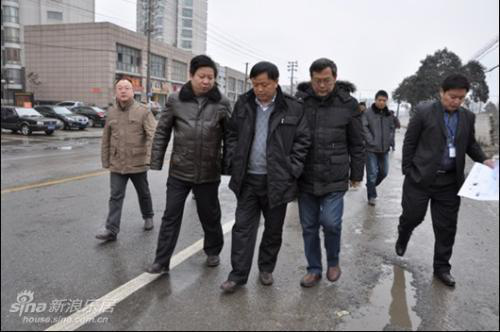

In [56]:
#Deploying the model 
filename ='/content/drive/MyDrive/Colab Notebooks/hardhat_photos2/test/no_helmets/testing.jpg'
img = open_image(filename)
img

In [61]:
pred = learn.predict(img)
print(pred)

(Category tensor(0), tensor(0), tensor([0.9981, 0.0019]))
